Logistische Regression предсказывает в виде "Да/Нет". Например 0 - Нет, 1 - Да. 

Математически можно описать так: берём линейную регрессию, переделываем предсказание в форму 0-1, теперь наша модель выдаёт предсказания в виде 0 и 1.

Выражается в виде Sigmoid-Funktion:

>S(x) = $\frac{1}{1 + e^-x} = \frac{e^x}{e^x + 1}$

Проще говоря, мы берём нашу линейную регрессию, запаковываем туда Sigmond-Funktion и можем использовать её в предсказаниях.

P.S.: как добавлять формулы https://colab.research.google.com/notebooks/markdown_guide.ipynb

In [ ]:
# Matplotlib config
%matplotlib inline

# SVG-Anzeige anschalten
%config InlineBackend.figure_formats = ['svg']

# Größe definieren
%config InlineBackend.rc = {'figure.figsize': (5.0, 3.0)}

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
path_diabetes = r"/content/drive/My Drive/Data Science/diabetes.csv"

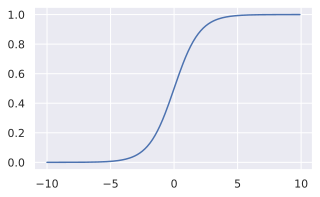

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = 1
b = 0
xs = np.arange(-10, 10, 0.1)
ys = sigmoid(a * xs + b) #передаём сюда формулу линейной регрессии
#ys = sigmoid(xs) #без коэффициентов

sns.lineplot(xs, ys);

In [ ]:
sigmoid(-0.5)

0.3775406687981454

In [ ]:
df = pd.read_csv(path_diabetes)

In [ ]:
df[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[["BMI", "Age"]]
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.75)

model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)
"""Или так
model.predict([[43, 50]])

Или так
x2 = pd.DataFrame([[23, 30]], columns = ["BMI", "Age"])
model.predict(x2)
"""

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
model.score(X_test, y_test)

0.6875

Можем проверить правильность модели и таким способом:

In [ ]:
y_test_pred = model.predict(X_test)
np.mean(y_test_pred == y_test)

0.6875



---


Есть метод .predict_proba, который показывает вероятность Да/Нет

In [ ]:
print(model.predict(X_test))
model.predict_proba(X_test)[:10]

[0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0]


array([[0.65324724, 0.34675276],
       [0.60658966, 0.39341034],
       [0.56307099, 0.43692901],
       [0.45673416, 0.54326584],
       [0.45168489, 0.54831511],
       [0.77226482, 0.22773518],
       [0.70275206, 0.29724794],
       [0.88268474, 0.11731526],
       [0.77704104, 0.22295896],
       [0.4458562 , 0.5541438 ]])

In [ ]:
model.predict_proba([
               [23, 50]
])

array([[0.70657927, 0.29342073]])

In [ ]:
"""model.classes_ показывает, что значат цифры. Так мы можем ориентироваться в информации model.predict_proba и model.predict
Мы видим, что на 0. месте стоит 0 (значит диабета нет), на 1.месте единица"""
model.classes_

array([0, 1])

In [ ]:
model.predict_proba(X_test)[:, 1] #выведет только вероятность с диабетом

array([0.34675276, 0.39341034, 0.43692901, 0.54326584, 0.54831511,
       0.22773518, 0.29724794, 0.11731526, 0.22295896, 0.5541438 ,
       0.51790654, 0.25594292, 0.34215359, 0.55294121, 0.58155251,
       0.310494  , 0.86486939, 0.62630983, 0.31680981, 0.36268632,
       0.30492463, 0.07316742, 0.34232495, 0.44029761, 0.29890165,
       0.48736299, 0.62142353, 0.66261271, 0.45518046, 0.64580031,
       0.21605831, 0.16349249, 0.31631573, 0.49408709, 0.44923098,
       0.2141593 , 0.26978335, 0.57792294, 0.73500449, 0.16150673,
       0.20753317, 0.30395896, 0.17467973, 0.45804709, 0.30116817,
       0.48504729, 0.42047545, 0.34383212, 0.70303078, 0.63597011,
       0.07623501, 0.33564892, 0.3126456 , 0.40218525, 0.69212959,
       0.57346726, 0.11110401, 0.48504729, 0.44825425, 0.46965116,
       0.32599191, 0.16847949, 0.14669522, 0.10032049, 0.225471  ,
       0.57060226, 0.11654613, 0.78550238, 0.15455024, 0.56638941,
       0.26433867, 0.34975455, 0.45096188, 0.00861828, 0.26336

In [ ]:
x2 = pd.DataFrame([
                   [23, 30]
], columns = ["BMI", "Age"])

In [ ]:
model.predict(x2)

array([0])

In [ ]:
model.predict_proba([[23, 30]])

array([[0.86216834, 0.13783166]])

In [ ]:
"""Простое сравнение модели с исходными данными"""

df_new = df[["BMI", "Age", "BloodPressure", "Outcome"]].copy()

dataF = pd.DataFrame({"BMI": df.BMI, "Age": df.Age}) #можем сделать такой DataFrame и передать его на учёбу
df_new["NewOutcome"] = model.predict(dataF)
df_new["NewOutcome2"] = model.predict(df[["BMI", "Age"]]) #можем не делать дополнительный DataFrame, а сразу учить

In [ ]:
df_new

,BMI,Age,BloodPressure,Outcome,NewOutcome,NewOutcome2
0,33.6,50,72,1,1,1
1,26.6,31,66,0,0,0
2,23.3,32,64,1,0,0
3,28.1,21,66,0,0,0
4,43.1,33,40,1,1,1
...,...,...,...,...,...,...
763,32.9,63,76,0,1,1
764,36.8,27,70,0,0,0
765,26.2,30,72,0,0,0
766,30.1,47,60,1,0,0
